In [40]:
#important imports
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
import imageio
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [41]:
# keras imports for the dataset and building our neural network
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [69]:
#Loading the data
data = pd.read_csv("./train_all_data.csv")
data.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna


In [44]:
#shuffling
from sklearn.utils import shuffle
data = shuffle(data)
data.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
10978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_16_tabala
7614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_14_dhaa
2107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_11_taamatar
44074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_33_ha
71037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_5


In [70]:
#convert label characters into label 0-int)
data['character_class'] = LabelEncoder().fit_transform(data.character)
data.drop('character', axis=1, inplace=True)
data = data.astype(np.uint8)

In [73]:
data['character_class']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
78170    45
78171    45
78172    45
78173    45
78174    45
78175    45
78176    45
78177    45
78178    45
78179    45
78180    45
78181    45
78182    45
78183    45
78184    45
78185    45
78186    45
78187    45
78188    45
78189    45
78190    45
78191    45
78192    45
78193    45
78194    45
78195    45
78196    45
78197    45
78198    45
78199    45
Name: character_class, Length: 78200, dtype: uint8

In [46]:
data.shape

(78200, 1025)

In [47]:
data.tail()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character_class
39547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23
24957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
39601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23
69957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41
32247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18


In [48]:
X = (data.values[:,:-1]/255.0* 0.99) + 0.01
y = data["character_class"].values

In [49]:
X.shape

(78200, 1024)

In [50]:
y.shape

(78200,)

In [51]:
X_train, X_vald, y_train, y_vald = train_test_split(X, y, test_size=0.2,random_state=1000, stratify=y)

In [52]:
print("X_train shape",X_train.shape)
print("X_vald shape",X_vald.shape)
print("y_train shape",y_train.shape)
print("y_vald shape",y_vald.shape)

X_train shape (62560, 1024)
X_vald shape (15640, 1024)
y_train shape (62560,)
y_vald shape (15640,)


In [54]:
nb_classes = 46

X_train = X_train.astype('float32')
X_vald = X_vald.astype('float32')

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_vald = np_utils.to_categorical(y_vald, nb_classes)

In [55]:
print('X_train matrix shape:', X_train.shape)
print('Number of train samples',X_train.shape[0])
print('number of vald samples',X_vald.shape[0])
print("One hot encoding: {}".format(Y_train[0, :]))

X_train matrix shape: (62560, 1024)
Number of train samples 62560
number of vald samples 15640
One hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [56]:
# one-hot encoding using keras' numpy-related utilities
print("Shape before one-hot encoding: ", y_train.shape)

print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (62560,)
Shape after one-hot encoding:  (62560, 46)


In [57]:
model = Sequential()
model.add(Dense(600, input_shape=(1024,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(600))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(46))
model.add(Activation('softmax'))

In [58]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=["accuracy"])

In [59]:
callback = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None)
fit_model = model.fit(X_train, Y_train,
          batch_size=100, epochs=30,
          verbose=2,
          validation_data=(X_vald, Y_vald),callbacks=callback)

Train on 62560 samples, validate on 15640 samples
Epoch 1/30
 - 39s - loss: 1.3560 - acc: 0.6320 - val_loss: 0.7243 - val_acc: 0.8029
Epoch 2/30
 - 24s - loss: 0.6504 - acc: 0.8164 - val_loss: 0.4709 - val_acc: 0.8702
Epoch 3/30
 - 26s - loss: 0.4578 - acc: 0.8707 - val_loss: 0.3531 - val_acc: 0.8997
Epoch 4/30
 - 24s - loss: 0.3500 - acc: 0.8988 - val_loss: 0.3050 - val_acc: 0.9132
Epoch 5/30
 - 25s - loss: 0.2823 - acc: 0.9184 - val_loss: 0.2595 - val_acc: 0.9253
Epoch 6/30
 - 26s - loss: 0.2374 - acc: 0.9311 - val_loss: 0.2405 - val_acc: 0.9285
Epoch 7/30
 - 27s - loss: 0.2039 - acc: 0.9398 - val_loss: 0.2214 - val_acc: 0.9356
Epoch 8/30
 - 25s - loss: 0.1776 - acc: 0.9477 - val_loss: 0.2021 - val_acc: 0.9409
Epoch 9/30
 - 28s - loss: 0.1534 - acc: 0.9543 - val_loss: 0.2064 - val_acc: 0.9387
Epoch 10/30
 - 25s - loss: 0.1357 - acc: 0.9589 - val_loss: 0.1924 - val_acc: 0.9433
Epoch 11/30
 - 25s - loss: 0.1212 - acc: 0.9637 - val_loss: 0.1894 - val_acc: 0.9443
Epoch 12/30
 - 25s - los

In [60]:
score = model.evaluate(X_vald, Y_vald, verbose=1)

15640/15640 [==============================] - 2s 142us/step


In [61]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17191249800743558
Test accuracy: 0.9567135550177006


In [62]:
# saving the model
save_dir = "/home/nishan/fuse_training"
model_name = 'model_all.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/nishan/fuse_training/model_all.h5 


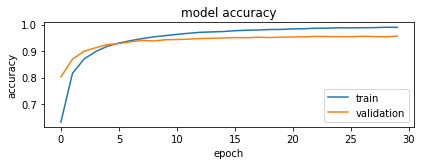

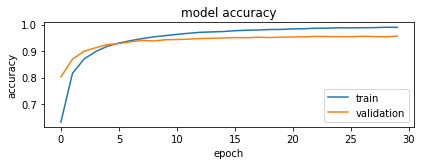

In [65]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(fit_model.history['acc'])
plt.plot(fit_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

plt.tight_layout()

fig

In [67]:
# load the model and create predictions on the test set
our_model = load_model("/home/nishan/fuse_training/model_all.h5")
predicted_classes = our_model.predict_classes(X_vald)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_vald)[0]
incorrect_indices = np.nonzero(predicted_classes != y_vald)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


14963  classified correctly
677  classified incorrectly
